In [2]:
#importimi i librarive 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import StandardScaler


pd.options.mode.chained_assignment = None  # default='warn'
from datetime import datetime


In [3]:
#importimi i datasetit
#hotelbookingDS = pd.read_csv(r"C:\Users\leand\Documents\FIEK\Master\Semester-1\PVDH\Projekti\dataset\hotel_bookings.csv")
hotelbookingDS = pd.read_csv(r"C:\Users\xonag\Documents\GitHub\Pergatitja-VizualizimiITeDhenave\hotel_bookings.csv")
hotelbookingDS = hotelbookingDS[(hotelbookingDS['is_canceled'] == 1) | (hotelbookingDS['is_canceled'] == 0)]
hotelbookingDS.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Pritnimi i atributeve e datasetit
print(hotelbookingDS.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [19]:
#analiza e vlerave ne dataset
hotelbookingDS.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#analiza e vlerave unike
print(hotelbookingDS.nunique())

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [6]:
#Marrja e nje monstre nga dataseti
hotelbookingDS.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40751,City Hotel,0,101,2015,August,32,6,0,2,1,...,No Deposit,9.0,NaN,0,Transient,68.00,0,1,Check-Out,2015-08-08
59252,City Hotel,1,73,2016,October,44,24,1,2,2,...,No Deposit,8.0,NaN,0,Transient,113.70,0,1,Canceled,2016-08-16
47274,City Hotel,1,2,2016,February,8,14,2,1,1,...,No Deposit,14.0,NaN,0,Transient-Party,79.00,0,0,No-Show,2016-02-14
107928,City Hotel,0,150,2017,March,11,15,1,4,2,...,No Deposit,9.0,NaN,0,Transient,88.40,0,2,Check-Out,2017-03-20
11216,Resort Hotel,1,100,2017,April,17,29,2,1,2,...,No Deposit,385.0,NaN,0,Transient-Party,85.00,0,0,Canceled,2017-04-21
454,Resort Hotel,0,113,2015,July,29,16,2,4,2,...,No Deposit,240.0,NaN,0,Transient,166.00,0,1,Check-Out,2015-07-22
14654,Resort Hotel,0,40,2016,September,40,29,2,4,1,...,No Deposit,201.0,NaN,0,Group,65.33,0,2,Check-Out,2016-10-05
40403,City Hotel,0,84,2015,July,30,25,0,1,2,...,No Deposit,8.0,NaN,0,Transient,94.00,0,2,Check-Out,2015-07-26
100328,City Hotel,0,46,2016,October,44,25,0,2,2,...,No Deposit,8.0,NaN,0,Transient,119.50,0,2,Check-Out,2016-10-27
54884,City Hotel,0,237,2016,July,31,28,2,4,2,...,No Deposit,9.0,NaN,0,Transient-Party,81.50,0,1,Check-Out,2016-08-03


In [7]:
# Numri i rezervimeve per cdo vit
hotelbookingDS.arrival_date_year.value_counts(ascending = False)

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [8]:
#Anulimi i rezervimeve varesisht nga viti
hotelbookingDS.groupby(['arrival_date_year','is_canceled']).size()

arrival_date_year  is_canceled
2015               0              13854
                   1               8142
2016               0              36370
                   1              20337
2017               0              24942
                   1              15745
dtype: int64

In [9]:
#Anulimi i rezervimeve varesisht nga lloji i hotelit
hotelbookingDS.groupby(['hotel','is_canceled']).size()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
dtype: int64

In [10]:
#Perqindja e anulimit te rezervimeve
canceled_percent = round(hotelbookingDS["is_canceled"].value_counts()/len(hotelbookingDS["is_canceled"])*100,3)
print("Canceled Percent: ")
print(canceled_percent)

Canceled Percent: 
0    62.958
1    37.042
Name: is_canceled, dtype: float64


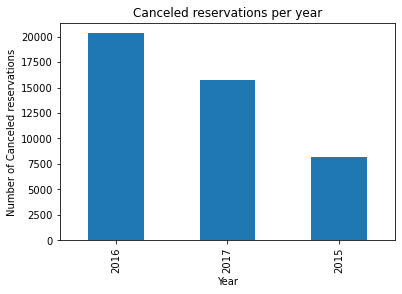

In [11]:
#Anulimi i rezervimeve sipas viteve te paraqitura grafikisht
c_year = hotelbookingDS['is_canceled'].groupby(hotelbookingDS['arrival_date_year'])
canceled = c_year.sum().sort_values(ascending=False)


ax = canceled.plot(kind="bar")
ax.set_title("Canceled reservations per year")
ax.set_ylabel("Number of Canceled reservations")
ax.set_xlabel("Year")
vals = ax.get_yticks()

In [12]:
#Renditja e shteteve ne varesi te numrit me te madh te anulimit te rezervimit
hotelbookingDS.country.value_counts(ascending = False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

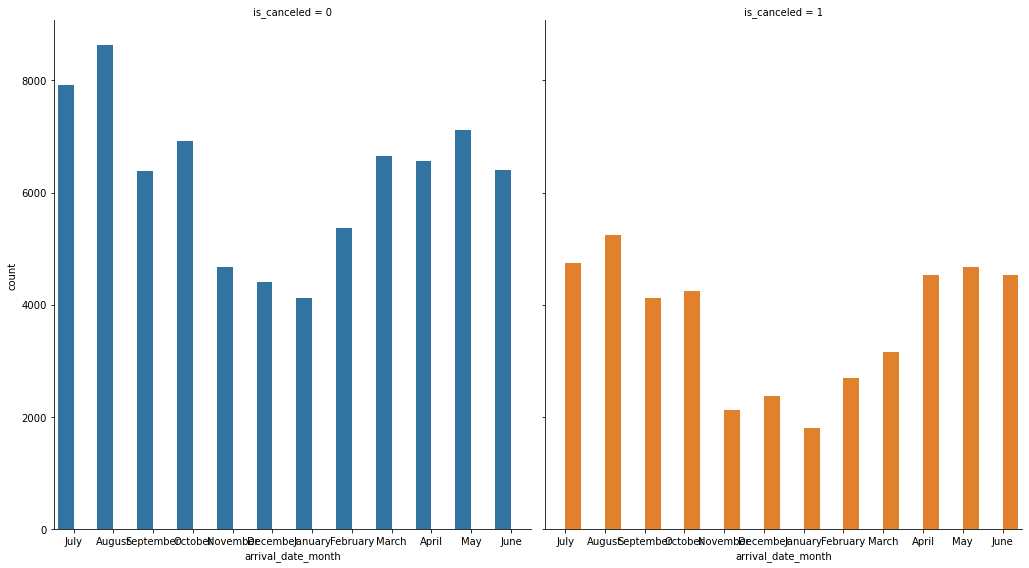

In [23]:
#Raporti ne mes te rezervimeve te anuluara dhe jo te anuluara sopas shtetit
sns.catplot(x="arrival_date_month",hue="is_canceled",col="is_canceled"
            ,data=hotelbookingDS,kind="count",height=8,aspect=.9);

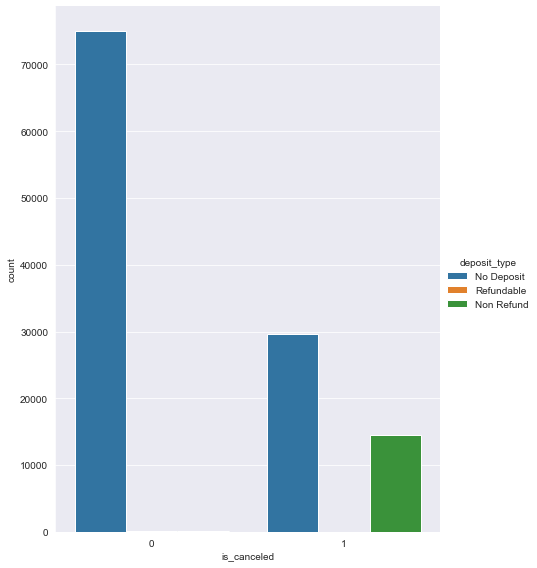

In [24]:
#Ndikimi kerkeses per depozit
sns.set_style('darkgrid')
sns.catplot(x="is_canceled", hue="deposit_type",
                data=hotelbookingDS, kind="count",
                height=8, aspect=.8)

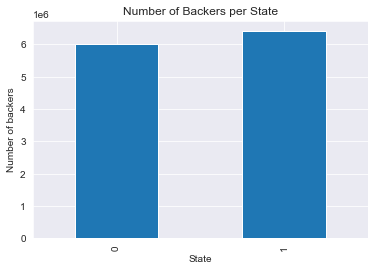

In [29]:
#Lead time per canceled and non canceled 
n_lead_time= hotelbookingDS['lead_time'].groupby(hotelbookingDS['is_canceled'])
lead_time = n_lead_time.sum().sort_values(ascending=True)


ax = lead_time.plot(kind="bar")
ax.set_title("Lead time per canceled and non canceled")
ax.set_ylabel("Lead time")
ax.set_xlabel("Canceled")
vals = ax.get_yticks()